In [69]:
%matplotlib inline

In [70]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
cmap = plt.get_cmap("tab20")
# 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'

plt.rc('font', family='serif')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize='small')     # fontsize of the axes title
plt.rc('axes', labelsize= 'small')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('ytick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-small')    # legend fontsize
plt.rc('figure', titlesize='medium')  # fontsize of the figure title

In [72]:
NO_OF_NODES = 10

In [73]:
beno = np.load('beno.npy')
deno = np.load('DENO.npy')
ceno = np.load('CENO.npy')
seno = np.load('SENO.npy')

In [74]:
states_list = beno[:,0]
actions = np.array(beno[:,1])
rewards = np.array(beno[:,2])
for i in range(24,np.int(rewards.shape[0]),24):
    rewards[i-24:i] = rewards[i]

states = np.array([np.array(x) for x in states_list])

batt = states[:,0]
enp = states[:,1]
henergy = states[:,2]
fcast = states[:,3]

beno = np.column_stack((batt,enp,henergy,fcast,actions,rewards))

In [75]:
batt = beno[:,0]
beno_total_downtime = (batt < 0.0055).astype(int)
beno_total_overflow = (batt == 1).astype(int)


In [76]:
batt = deno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
deno_total_downtime = downtime_occur.sum(axis=0)
deno_total_overflow = overflow_occur.sum(axis=0)


In [77]:
batt = ceno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
ceno_total_downtime = downtime_occur.sum(axis=0)
ceno_total_overflow = overflow_occur.sum(axis=0)


In [78]:
batt = seno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
seno_total_downtime = downtime_occur.sum(axis=0)
seno_total_overflow = overflow_occur.sum(axis=0)


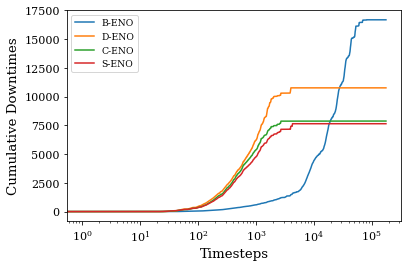

In [79]:
dummy = np.zeros_like(beno_total_downtime)
dummy[:deno_total_downtime.shape[0]] = deno_total_downtime
deno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:ceno_total_downtime.shape[0]] = ceno_total_downtime
ceno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:seno_total_downtime.shape[0]] = seno_total_downtime
seno_total_downtime = dummy

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(beno_total_downtime.cumsum())
ax.plot(deno_total_downtime.cumsum())
ax.plot(ceno_total_downtime.cumsum())
ax.plot(seno_total_downtime.cumsum())
ax.set_xscale('log')
ax.legend(['B-ENO','D-ENO','P-ENO','S-ENO'])

ax.set_ylabel('Cumulative Downtimes')
ax.set_xlabel('Timesteps')
fig.tight_layout()
plt.savefig("downtimes.png",bbox_inches='tight')

In [80]:
# dummy = np.zeros_like(beno_total_overflow)
# dummy[:deno_total_overflow.shape[0]] = deno_total_overflow
# deno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:ceno_total_overflow.shape[0]] = ceno_total_overflow
# ceno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:seno_total_overflow.shape[0]] = seno_total_overflow
# seno_total_overflow = dummy




# plt.plot(beno_total_overflow.cumsum())
# plt.plot(deno_total_overflow.cumsum())
# plt.plot(ceno_total_overflow.cumsum())
# plt.plot(seno_total_overflow.cumsum())

# plt.xscale('log')
# plt.legend(['beno','deno','ceno','seno'])

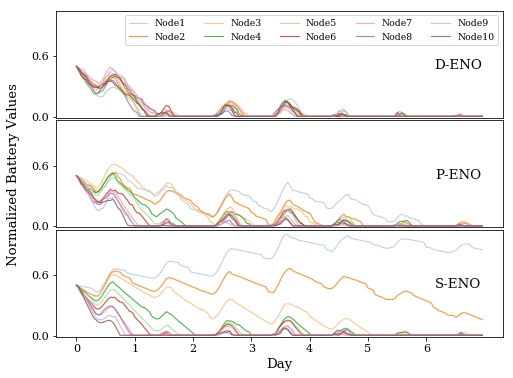

In [131]:
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',figsize=(8,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.02)

eno = ['D-ENO','P-ENO','S-ENO']
for i in range(3):
        ax[i].set_ylim([-0.01,1.05])    
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].set_title(eno[i], x = 0.9, y=0.4)

ax[0].xaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[2].set_xticks(np.arange(0,24*7,24))
ax[2].set_xticklabels(np.arange(0,7))
ax[2].set_xlabel('Day')
fig.text(0.04, 0.5, 'Normalized Battery Values', va='center', rotation='vertical', fontsize='small')


for i in range(NO_OF_NODES):
    ax[0].plot(deno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[1].plot(ceno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[2].plot(seno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))

# ax.plot(beno_total_downtime.cumsum())
# ax.plot(deno_total_downtime.cumsum())
# ax.plot(ceno_total_downtime.cumsum())
# ax.plot(seno_total_downtime.cumsum())
# ax.set_xscale('log')

# ax.set_ylabel('Cumulative Downtimes')
# ax.set_xlabel('Timesteps')

label = ["Node"+str(i+1) for i in range(10)]
ax[0].legend(label,loc = 'upper right',ncol=5)
# fig.tight_layout()
plt.savefig("init_Batts.png",bbox_inches='tight')

In [145]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(deno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [146]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(ceno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [147]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(seno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [148]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(deno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

In [149]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(ceno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

In [150]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(seno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

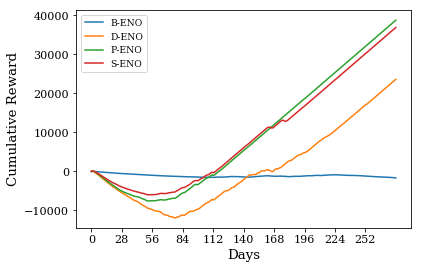

In [165]:
deno_all_node_reward = deno[:,:,-1].sum(axis=0)
ceno_all_node_reward = ceno[:,:,-1].sum(axis=0)
seno_all_node_reward = seno[:,:,-1].sum(axis=0)

fig = plt.figure()
plt.plot(beno[0:280*24,-1].cumsum())
plt.plot(deno_all_node_reward.cumsum())
plt.plot(ceno_all_node_reward.cumsum())
plt.plot(seno_all_node_reward.cumsum())
plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO'])

plt.xlabel('Days')
plt.xticks(np.arange(0,24*280,24*28),np.arange(0,280,28).astype(int));
plt.ylabel('Cumulative Reward')
plt.savefig("cum_reward.png",bbox_inches='tight')

In [19]:
#calculated 4-way variance as cov(A,B,C,D) = E[ (A - E(A)) . (B - E(B)) . (C - E(C)) . (D - E(D)) ]
def var4(chunk):
    b_dev = chunk[:,0] - chunk[:,0].mean()
    e_dev = chunk[:,1] - chunk[:,1].mean()
    h_dev = chunk[:,2] - chunk[:,2].mean()
    f_dev = chunk[:,3] - chunk[:,3].mean()
    cov4 = np.mean(np.multiply(np.multiply(b_dev,e_dev),np.multiply(h_dev,f_dev)))
    return cov4

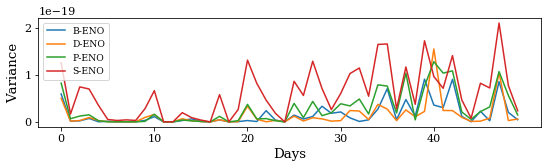

In [164]:
DAY_LEN = 50
fig = plt.figure(figsize=(9,2))


states = beno[0:24*DAY_LEN,0:4]
chunklist = (np.split(states,DAY_LEN))
beno_var = np.array([var4(i) for i in chunklist])
plt.plot(np.abs(beno_var))

states = deno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
chunklist = (np.split(day_wise,DAY_LEN))
deno_var = np.array([var4(i) for i in chunklist])
plt.plot(np.abs(deno_var))

states = ceno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
chunklist = (np.split(day_wise,DAY_LEN))
ceno_var = np.array([var4(i) for i in chunklist])
plt.plot(np.abs(ceno_var))

states = seno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
chunklist = (np.split(day_wise,DAY_LEN))
seno_var = np.array([var4(i) for i in chunklist])
plt.plot(np.abs(seno_var))

plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO'])

plt.xlabel('Days')
plt.xticks(np.arange(0,DAY_LEN,10),np.arange(0,DAY_LEN,10).astype(int));
plt.ylabel('Variance')
plt.savefig("variance.png",bbox_inches='tight')
